# Project 소개

### 소프트웨어융합학과 정다영

### 1. 주제
의류 가상 피팅

### 2. 프로젝트 과정
<img src='프로젝트과정.JPG' style='width:700px;'>

---

# 프로젝트 코드

## 라이브러리 불러오기

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## INPUT

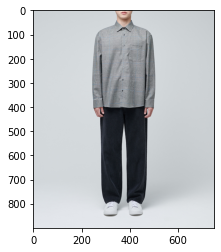

In [3]:
# 사용자 이미지 불러오기
temp_input_user = cv2.imread('C:/Users/Jung_dayoung/git_upload/HYPER/Virtual_Fitting_Service/input_dir/input_user_5.jpg')
input_user = cv2.cvtColor(temp_input_user, cv2.COLOR_BGR2RGB)

# plot
plt.imshow(input_user)
plt.show()

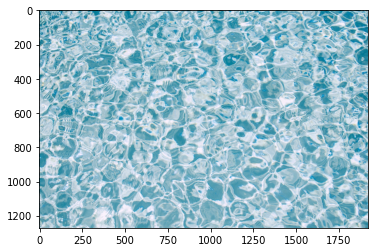

In [3]:
# 패턴 이미지 불러오기
temp_input_pattern = cv2.imread('C:/Users/Jung_dayoung/git_upload/HYPER/Virtual_Fitting_Service/input_dir/pattern10.jpg')
input_pattern = cv2.cvtColor(temp_input_pattern, cv2.COLOR_BGR2RGB)

# plot
plt.imshow(input_pattern)
plt.show()

## grabCut을 이용한 의류 분할

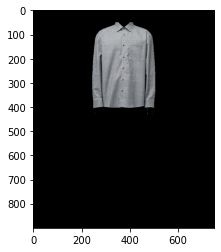

In [10]:
# garbcut 범위 설정
x_point = 200
y_point = 50
width = 400
height = 400
rectangle = (x_point, y_point, width, height)

# 초기 마스크 생성
mask = np.zeros(input_user.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(input_user,mask, rectangle, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
grabcut_user = input_user * mask_2[:, :, np.newaxis]
cv2.imwrite("segmented_dir/grabcut_user.jpg",grabcut_user)

# plot
plt.imshow(grabcut_user)
plt.show()

## numpy 와 bitwise 연산을 이용한 이미지 이진화

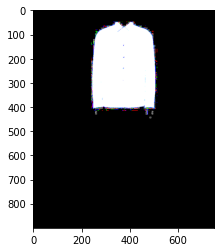

In [11]:
# grabcut_user 이미지 불러오기
temp_grabcut_user = cv2.imread('C:/Users/Jung_dayoung/git_upload/HYPER/Virtual_Fitting_Service/segmented_dir/grabcut_user.jpg')

# grabcut_user 이미지 이진화
white_grabcut_user = np.zeros_like(temp_grabcut_user)
white_grabcut_user[temp_grabcut_user>0] = 255

# 이진화된 grabcut_user 이미지 저장
cv2.imwrite("segmented_dir/white_grabcut_user.jpg",white_grabcut_user)

# plot
plt.imshow(white_grabcut_user)
plt.show()

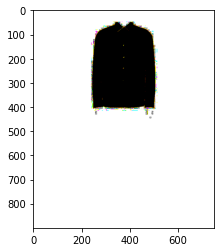

In [12]:
# 이진화된 grabcut_user 이미지 반전 시키기
black_grabcut_user = cv2.bitwise_not(white_grabcut_user)

# 이진화된 grabcut_user 반전 이미지 저장
cv2.imwrite("segmented_dir/black_grabcut_user.jpg",black_grabcut_user)

# plot
plt.imshow(black_grabcut_user)
plt.show()

## 이미지 합성

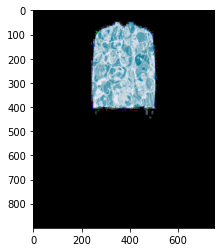

In [13]:
# white_grabcut_user 이미지 불러오기
white_grabcut_user = cv2.imread('C:/Users/Jung_dayoung/git_upload/HYPER/Virtual_Fitting_Service/segmented_dir/white_grabcut_user.jpg')

# 패턴 이미지 사이즈 조정
resize_pattern = cv2.resize(input_pattern, dsize=(input_user.shape[1],input_user.shape[0]), interpolation = cv2.INTER_AREA)

# 이진화된 사용자와 패턴 이미지 합성
patterned_grabcut_user = cv2.bitwise_and(resize_pattern, white_grabcut_user)


# 합성된 이미지 저장
cv2.imwrite("segmented_dir/patterned_grabcut_user.jpg",patterned_grabcut_user)

# plot
plt.imshow(patterned_grabcut_user)
plt.show()

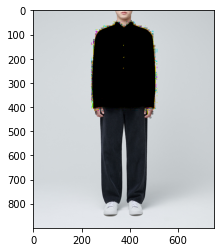

In [14]:
# 사용자 의류 검은색으로 변경
black_user = cv2.bitwise_and(input_user, black_grabcut_user)

# 변경된 이미지 저장
cv2.imwrite("segmented_dir/black_user.jpg",black_user)

#plot
plt.imshow(black_user)
plt.show()

## OUTPUT

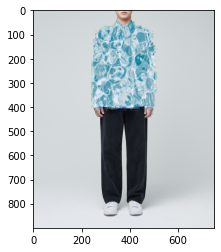

In [15]:
#bitwise를 이용하여 이미지 합성
output_user = cv2.bitwise_or(patterned_grabcut_user, black_user)


# 합성된 이미지 저장
cv2.imwrite("output_dir/output_user.jpg",output_user)

# plot
plt.imshow(output_user)
plt.show()

---